In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd

df = pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
from sklearn.preprocessing import LabelEncoder
df["sex"] = LabelEncoder().fit_transform(df["sex"])
df["smoker"] = LabelEncoder().fit_transform(df["smoker"])
df["region"] = LabelEncoder().fit_transform(df["region"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [6]:
new_index=['charges','age','sex','bmi','children','smoker', 'region']
df=df.reindex(columns=new_index)

In [7]:
df.drop(["sex","region", "smoker"], axis = 1, inplace = True)

In [8]:
df

,charges,age,bmi,children
0,16884.92400,19,27.900,0
1,1725.55230,18,33.770,1
2,4449.46200,28,33.000,3
3,21984.47061,33,22.705,0
4,3866.85520,32,28.880,0
...,...,...,...,...
1333,10600.54830,50,30.970,3
1334,2205.98080,18,31.920,0
1335,1629.83350,18,36.850,0
1336,2007.94500,21,25.800,0


In [9]:
df.describe()

,charges,age,bmi,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,13270.422265,39.207025,30.663397,1.094918
std,12110.011237,14.049960,6.098187,1.205493
min,1121.873900,18.000000,15.960000,0.000000
25%,4740.287150,27.000000,26.296250,0.000000
50%,9382.033000,39.000000,30.400000,1.000000
75%,16639.912515,51.000000,34.693750,2.000000
max,63770.428010,64.000000,53.130000,5.000000


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [11]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters = 2, tol = 0.01, random_state = 0).fit_predict(X)

In [12]:
print(clusters)

[0 0 0 ... 0 0 1]


In [13]:
df["clusters"] = clusters.tolist()

In [14]:
df

,charges,age,bmi,children,clusters
0,16884.92400,19,27.900,0,0
1,1725.55230,18,33.770,1,0
2,4449.46200,28,33.000,3,0
3,21984.47061,33,22.705,0,0
4,3866.85520,32,28.880,0,0
...,...,...,...,...,...
1333,10600.54830,50,30.970,3,1
1334,2205.98080,18,31.920,0,0
1335,1629.83350,18,36.850,0,0
1336,2007.94500,21,25.800,0,0


In [15]:
distortions = []
spread = range(1,26)

for k in spread:
    model = KMeans(n_clusters = k, tol = 0.01, random_state = 0)
    model.fit(X)
    distortions.append(model.inertia_)
print(distortions)

[5352.0, 4092.3244084547305, 3317.876104706823, 2572.420883962849, 2211.181152695508, 1986.43194227519, 1800.92152496147, 1662.292092849439, 1560.5396413999638, 1471.8406205030353, 1380.1232718669312, 1329.1733401789957, 1246.070616074095, 1198.6651368422367, 1127.69624841659, 1076.8401922496448, 1030.6355756937035, 991.8771234208301, 962.991490429343, 920.7617853765654, 894.164509665909, 867.9058890460241, 856.2903820933367, 832.1091705188365, 805.9356831487788]


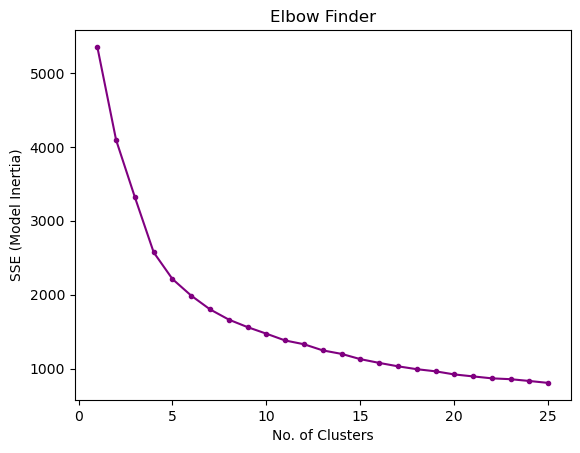

In [16]:
import matplotlib.pyplot as plt
plt.plot(spread, distortions, marker='.', c = "purple")
plt.title('Elbow Finder')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE (Model Inertia)')
plt.show()

In [38]:
clusters = KMeans(n_clusters = 5, tol = 0.01, random_state = 0).fit_predict(X)

In [39]:
df["clusters_optimized"] = clusters.tolist()

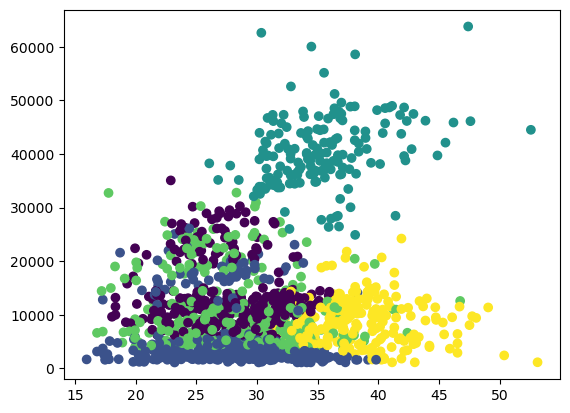

In [40]:
plt.scatter(df["bmi"], df["charges"], c = df.clusters_optimized)
plt.show()

In [41]:
from sklearn.cluster import MeanShift

bandwidth = 2.0

mean_shift= MeanShift(bandwidth = bandwidth)
mean_shift.fit(X)

MeanShift(bandwidth=2.0)

In [42]:
clusters_mean_shift = mean_shift.predict(X)

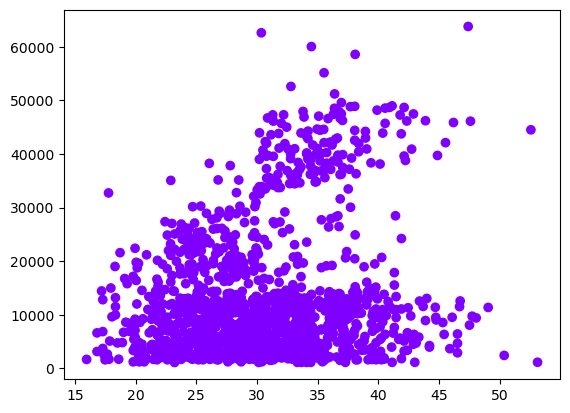

In [43]:
plt.scatter(df["bmi"], df["charges"], c = clusters_mean_shift, cmap="rainbow")
plt.show()

In [44]:
clusters_mean_shift

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.15, 
                               n_samples=None, 
                               random_state=0, n_jobs=None).round()

print(bandwidth)

2.0


In [46]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=9.25, min_samples = 3)
clusters = dbscan.fit_predict(X)

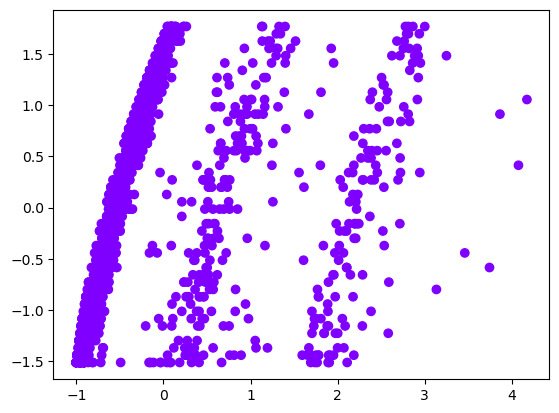

In [48]:
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="rainbow")
# Need to find out how to plot the DBSCAN cluster centres
# plt.scatter(dbscan.cluster_centers_[:, 0], 
# dbscan.cluster_centers_[:, 1], color='red', marker='+', s=100)
plt.show()